In [0]:
from google.colab import files




In [4]:
files.upload()

Saving test_format.csv to test_format.csv
Saving train_format.csv to train_format.csv


{'test_format.csv': b'5 Minutes,Lane 1 Flow (Veh/5 Minutes),# Lane Points,% Observed\r\n04/11/2015 00:00,0,1,100\n04/11/2015 00:05,0,1,100\n04/11/2015 00:10,0,1,100\n04/11/2015 00:15,0,1,100\n04/11/2015 00:20,0,1,100\n04/11/2015 00:25,0,1,100\n04/11/2015 00:30,1,1,100\n04/11/2015 00:35,0,1,100\n04/11/2015 00:40,0,1,100\n04/11/2015 00:45,0,1,100\n04/11/2015 00:50,0,1,100\n04/11/2015 00:55,0,1,100\n04/11/2015 01:00,0,1,100\n04/11/2015 01:05,0,1,100\n04/11/2015 01:10,0,1,100\n04/11/2015 01:15,5,1,100\n04/11/2015 01:20,8,1,100\n04/11/2015 01:25,12,1,100\n04/11/2015 01:30,6,1,100\n04/11/2015 01:35,7,1,100\n04/11/2015 01:40,6,1,100\n04/11/2015 01:45,3,1,100\n04/11/2015 01:50,12,1,100\n04/11/2015 01:55,6,1,100\n04/11/2015 02:00,5,1,100\n04/11/2015 02:05,4,1,100\n04/11/2015 02:10,1,1,100\n04/11/2015 02:15,6,1,100\n04/11/2015 02:20,6,1,100\n04/11/2015 02:25,5,1,100\n04/11/2015 02:30,6,1,100\n04/11/2015 02:35,3,1,100\n04/11/2015 02:40,8,1,100\n04/11/2015 02:45,4,1,100\n04/11/2015 02:50,5,1,100\n

In [0]:
import pandas as pd

In [0]:
df1 =pd.read_csv('/content/train_format.csv',encoding='utf-8').fillna(0)
df2 = pd.read_csv('/content/test_format.csv',encoding='utf-8').fillna(0)

In [0]:
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
df1['Lane 1 Flow (Veh/5 Minutes)']

0        3
1       12
2        4
3        9
4        5
        ..
8909    16
8910    12
8911    18
8912    10
8913    21
Name: Lane 1 Flow (Veh/5 Minutes), Length: 8914, dtype: int64

In [0]:
def process_data(train, test, lags):
    
   
    attr = 'Lane 1 Flow (Veh/5 Minutes)'
    
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(df1[attr].values.reshape(-1, 1))
    flow1 = scaler.transform(df1[attr].values.reshape(-1, 1)).reshape(1, -1)[0]
    flow2 = scaler.transform(df2[attr].values.reshape(-1, 1)).reshape(1, -1)[0]

    train, test = [], []
    for i in range(lags, len(flow1)):
        train.append(flow1[i - lags: i + 1])
    for i in range(lags, len(flow2)):
        test.append(flow2[i - lags: i + 1])

    train = np.array(train)
    test = np.array(test)
    np.random.shuffle(train)

    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:, -1]

    return X_train, y_train, X_test, y_test, scaler

In [0]:
x_train, y_train, x_test, y_test , scaler = process_data(df1,df2,12)


In [11]:
x_train

array([[0.6039604 , 0.48514851, 0.71287129, ..., 0.55445545, 0.5049505 ,
        0.67326733],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07920792, 0.05940594, 0.04950495, ..., 0.02970297, 0.01980198,
        0.        ],
       ...,
       [0.08910891, 0.15841584, 0.06930693, ..., 0.10891089, 0.11881188,
        0.0990099 ],
       [0.26732673, 0.40594059, 0.18811881, ..., 0.17821782, 0.1980198 ,
        0.24752475],
       [0.35643564, 0.35643564, 0.25742574, ..., 0.22772277, 0.18811881,
        0.11881188]])

In [12]:
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential
from keras.layers import Bidirectional

Using TensorFlow backend.


In [13]:
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(12, 1), return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [0]:

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
x_train.shape

(8902, 12, 1)

In [16]:


model.compile(loss="mse", optimizer="SGD", metrics=['mape'])

hist = model.fit(
        x_train, y_train,
        batch_size=256,
        epochs=500,
        validation_split=0.05)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8456 samples, validate on 446 samples
Epoch 1/500





8456/8456 [==============================] - 15s 2ms/step - loss: 0.0935 - mean_absolute_percentage_error: 23900087.4621 - val_loss: 0.0884 - val_mean_absolute_percentage_error: 24248916.6547
Epoch 2/500
8456/8456 [==============================] - 3s 382us/step - loss: 0.0802 - mean_absolute_percentage_error: 22520344.2081 - val_loss: 0.0768 - val_mean_absolute_percentage_error: 22881984.9103
Epoch 3/500
8456/8456 [==============================] - 3s 373us/step - loss: 0.0697 - mean_absolute_percentage_error: 21288945.2825 - val_loss: 0.0680 - val_mean_absolute_percentage_error: 21697546.9910
Epoch 4/500
8456/8456 [==============================] - 3s 381us/step - loss: 0.0617 - mean_absolute_percentage_error

In [0]:
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [0]:
y_preds = []

In [0]:
predicted = model.predict(X_test)
predicted2 = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
y_preds.append(predicted2[:288])

In [0]:
import math
import warnings
import numpy as np
import pandas as pd

from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
def MAPE(y_true, y_pred):


    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]

    num = len(y_pred)
    sums = 0

    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp

    mape = sums * (100 / num)

    return mape

In [0]:
def eva_regress(y_true, y_pred):
    

    mape = MAPE(y_true, y_pred)
   
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
   
   
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
   

In [23]:
eva_regress(y_test, predicted)

mape:103.893387%
mae:0.089548
mse:0.014469
rmse:0.120287


In [0]:
def plot_results(y_true, y_preds):
    
    d = '2015-4-11 00:00'
    x = pd.date_range(d, periods=288, freq='5min')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x, y_true, label='True Data')
    ax.plot(x, y_preds, color= 'red', label='Bidirectional LSTM')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Time of Day')
    plt.ylabel('Flow')

    date_format = mpl.dates.DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


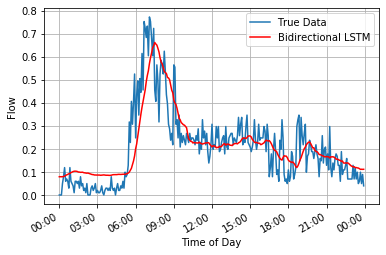

In [25]:
 plot_results(y_test[:288], predicted[:288])